In this code, our objective is to train some neural network models on our test data.

### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import timeit
import time
%alias_magic t timeit

plt.style.use('seaborn-talk')

from matplotlib import rcParams

# import warnings filter
from warnings import simplefilter 
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

Created `%t` as an alias for `%timeit`.
Created `%%t` as an alias for `%%timeit`.


In [2]:
SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 18
plt.rc('figure', figsize=(10,6))
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)     # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)     # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title

# Import phase I data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Gadget 2 Data / with Neutrino

In [4]:
data = pd.read_csv(r'/content/drive/MyDrive/denc_Neutrino')
# data['in_halo'] = (data['haloID']>0).astype('int')
data['in_halo'] = (data['halo_mass']>1600).astype('int32')
data

id  haloID  halo_mass  ...  dc for 18.1  dc for 20.0  in_halo
0      10156552     755     2280.0  ...    -0.011940    -0.010111        1
1      11068486      85     1539.0  ...    -0.011500    -0.012220        0
2       9530036     654     1944.0  ...     0.005231     0.003787        1
3      11455022     752     1394.0  ...    -0.000868     0.001568        0
4       8591034     356     1649.0  ...     0.013111     0.013433        1
...         ...     ...        ...  ...          ...          ...      ...
99995   2160800     451     2634.0  ...    -0.005002     0.000918        1
99996   3257728      43     1112.0  ...     0.002627     0.006124        0
99997   6101605     484     1198.0  ...    -0.017154    -0.012600        0
99998   4576456      44     1058.0  ...    -0.007463     0.004673        0
99999  13755625     374     3436.0  ...     0.013776     0.014595        1

[100000 rows x 16 columns]

In [5]:
data.describe()

id         haloID  ...    dc for 20.0        in_halo
count  1.000000e+05  100000.000000  ...  100000.000000  100000.000000
mean   8.716004e+06     424.627710  ...      -0.000224       0.557930
std    3.549230e+06     230.962533  ...       0.010084       0.496635
min    2.131444e+06      16.000000  ...      -0.038371       0.000000
25%    5.953820e+06     238.000000  ...      -0.006964       0.000000
50%    9.043250e+06     418.000000  ...      -0.000713       1.000000
75%    1.176120e+07     619.000000  ...       0.006694       1.000000
max    1.464652e+07     870.000000  ...       0.032602       1.000000

[8 rows x 16 columns]

#### Visualize Data

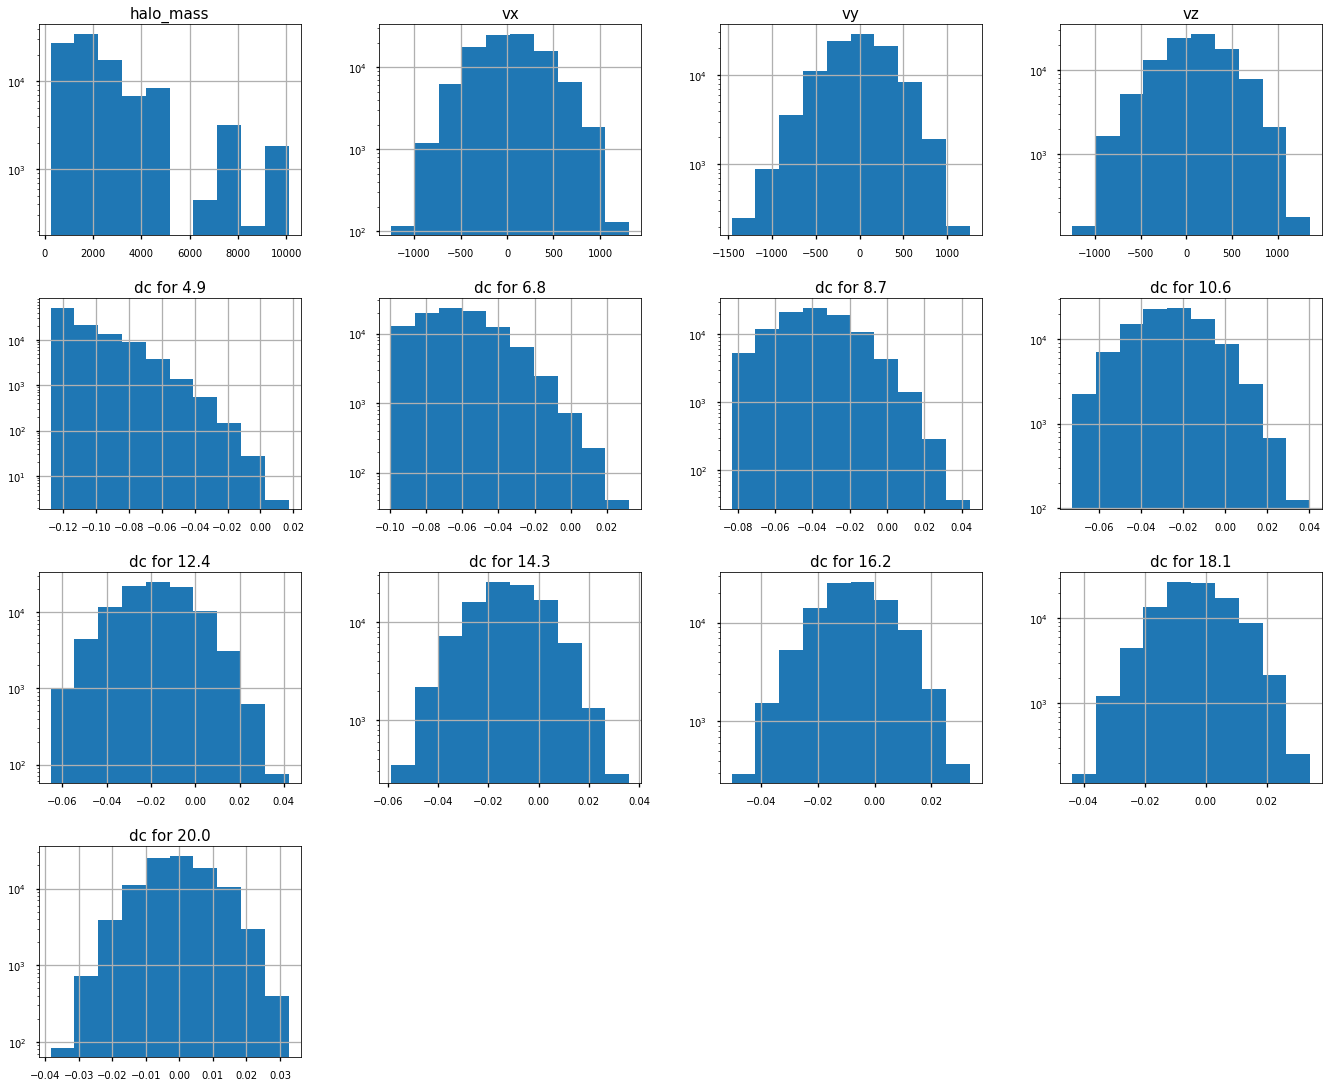

In [6]:
data.iloc[:,2:15].hist(figsize=(23,19), log=True)
plt.show()

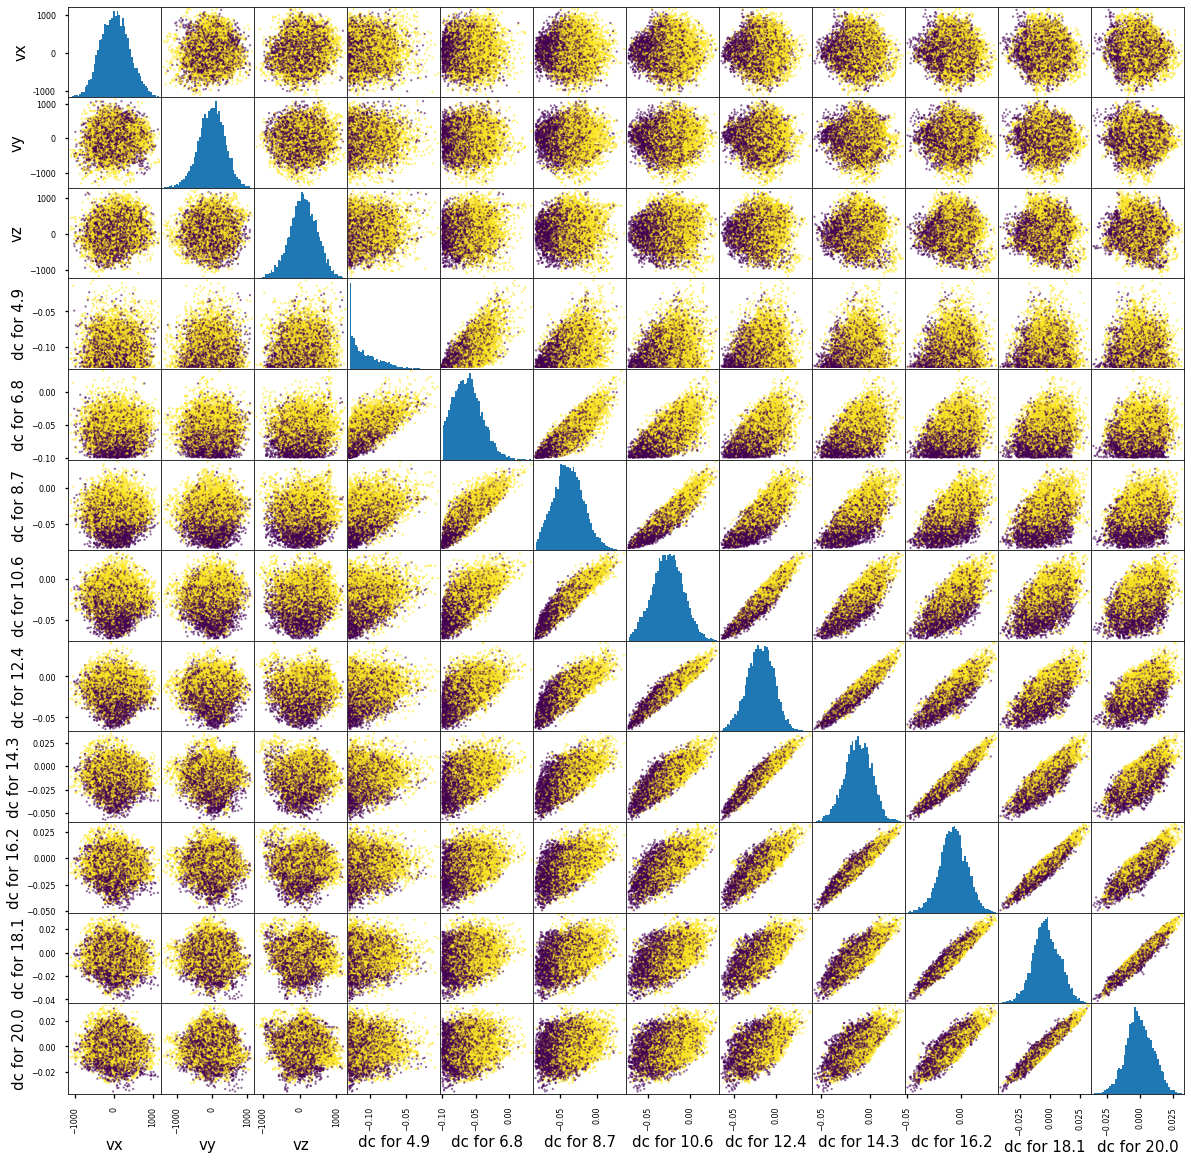

In [7]:
N_sample=10_000
data_mini = data.sample(N_sample , random_state=0)
target = 'in_halo'

_=pd.plotting.scatter_matrix(data_mini.iloc[:,3:15], c=data_mini[target] , cmap = plt.cm.viridis,
                            figsize=(20,20), marker='o', s=5, 
                            hist_kwds={'bins':50} , alpha = .6)

### Gadget 2 Data / without Neutrino

In [8]:
data_cdm = pd.read_csv(r'/content/drive/MyDrive/denc_CDM')
data_cdm['in_halo'] = (data_cdm['halo_mass']>1600).astype('int32')
data_cdm

id  haloID  halo_mass  ...  dc for 18.1  dc for 20.0  in_halo
0       8981131     414     1504.0  ...     0.691070     0.457584        0
1       9901676    1026     1013.0  ...     0.617267     0.431845        0
2       8288987    1079      727.0  ...     0.003315     0.076079        0
3       4842631     675     1268.0  ...    -0.334146    -0.231578        0
4      12884124     437     6128.0  ...     0.049055     0.101472        1
...         ...     ...        ...  ...          ...          ...      ...
99995  12466311    1085     5542.0  ...     0.103515     0.090791        1
99996  11857185     491      691.0  ...    -0.347015    -0.253660        0
99997   9340191     947      868.0  ...    -0.175261    -0.202931        0
99998  13317963    1034     1175.0  ...    -0.282089    -0.284524        0
99999   5325551      45      818.0  ...     0.096964    -0.043834        0

[100000 rows x 16 columns]

#### Visualize Data

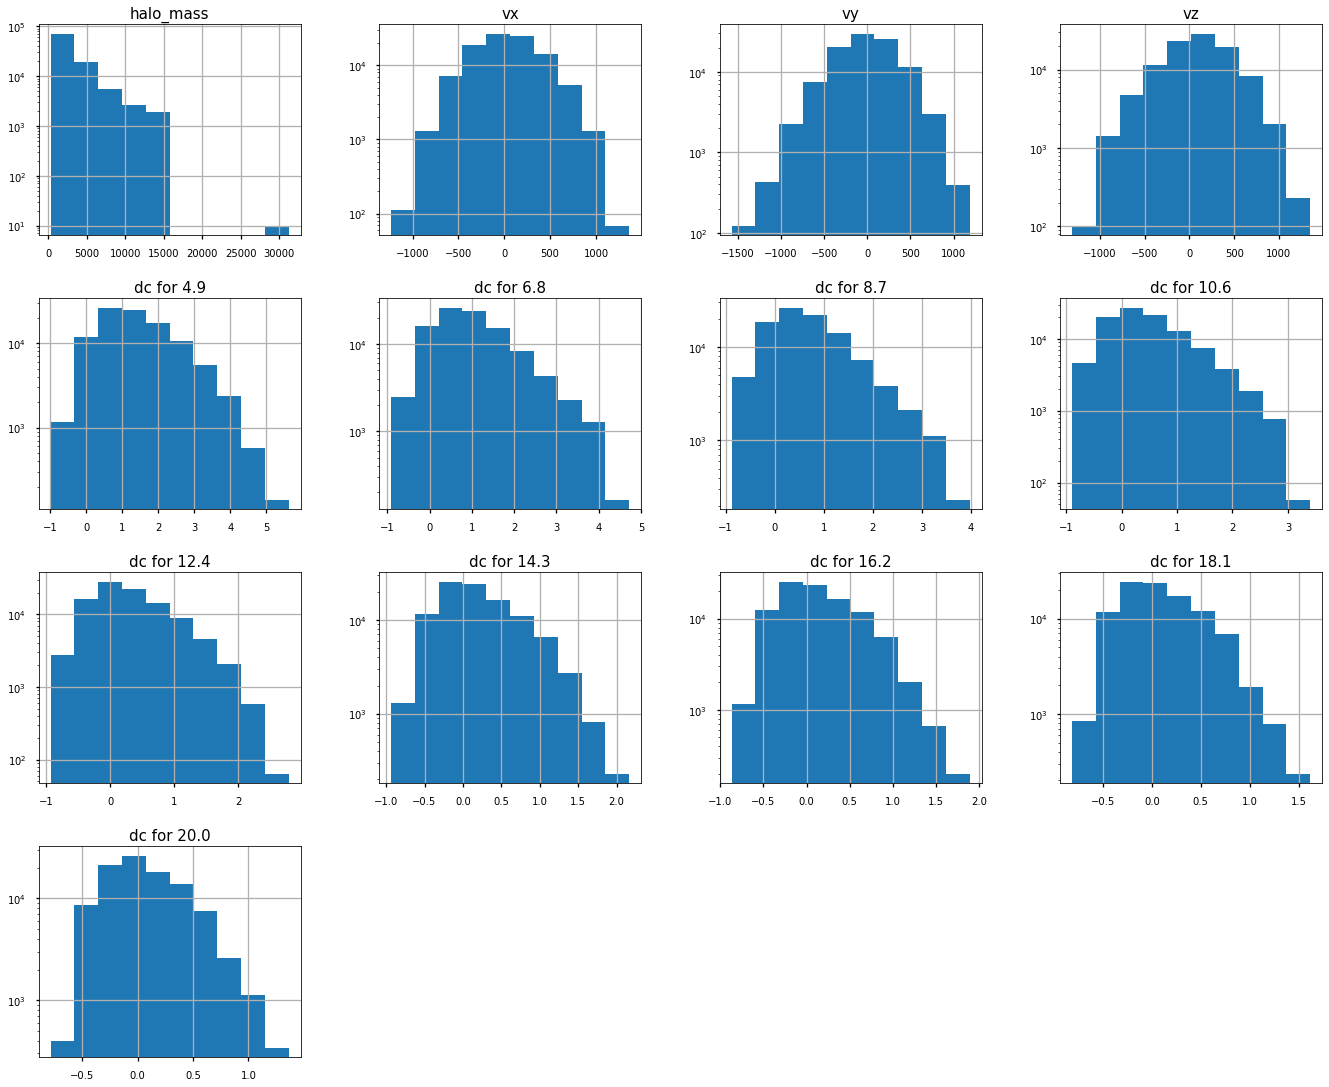

In [9]:
data_cdm.iloc[:,2:15].hist(figsize=(23,19), log=True)
plt.show()

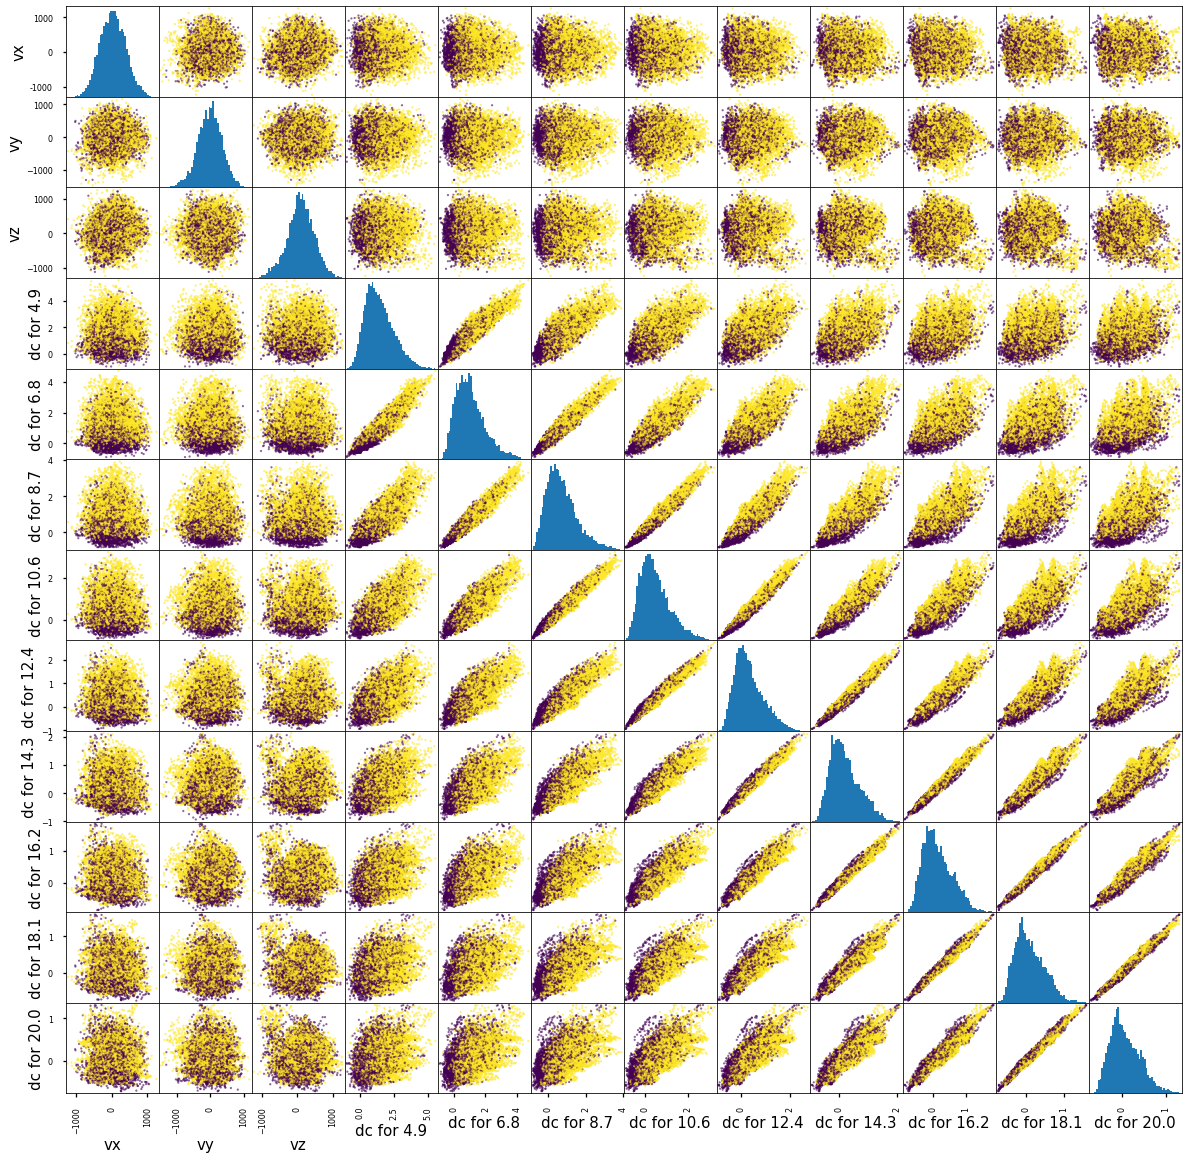

In [10]:
N_sample=10_000
data_mini = data_cdm.sample(N_sample , random_state=0)
target = 'in_halo'

_=pd.plotting.scatter_matrix(data_mini.iloc[:,3:15], c=data_mini[target] , cmap = plt.cm.viridis,
                            figsize=(20,20), marker='o', s=5, 
                            hist_kwds={'bins':50} , alpha = .6)

## Define Datasets

In [11]:
## Neutrino
X = data.iloc[:,3:15].astype('float32').values
Y = data.in_halo.astype('int32').values

In [12]:
## CDM
X2 = data_cdm.iloc[:,3:15].astype('float32').values
Y2 = data_cdm.in_halo.astype('int32').values

In [13]:
## Scale / Neutrino
X = (X - np.mean(X))/np.std(X)

In [14]:
## Scale / CDM
X2 = (X2 - np.mean(X2))/np.std(X2)

In [15]:
## Split into test and train / Neutrino

tst_size = 0.2
ns, nf = np.shape(X) 
X_train, X_test, Y_train, Y_test = train_test_split(*shuffle(X, Y, n_samples = ns, random_state=0) , random_state=0, test_size =tst_size )
print('X_train :',len(X_train),'   X_test :',len(X_test))

X_train : 80000    X_test : 20000


In [16]:
## Split into test and train / CDM

tst_size = 0.2
ns, nf = np.shape(X) 
X2_train, X2_test, Y2_train, Y2_test = train_test_split(*shuffle(X, Y, n_samples = ns, random_state=0) , random_state=0, test_size =tst_size )
print('X2_train :',len(X2_train),'   X2_test :',len(X2_test))

X2_train : 80000    X2_test : 20000


# Pytorch

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

## Minibatch correct


In [81]:
n_feat = 12
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_feat, 2)  
        self.fc2 = nn.Linear(2, 10)
        self.fc3 = nn.Linear(10, 30)
        
        self.fc4 = nn.Linear(30, 50)
        self.fc5 = nn.Linear(50, 20)
        self.fc6 = nn.Linear(20, 10)
        self.out = nn.Linear(10, 1)
        

    def forward(self, x):
        # x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        # print(x)
        output = F.sigmoid(self.out(x))
        # print(output)
        return output

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (fc1): Linear(in_features=12, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=30, bias=True)
  (fc4): Linear(in_features=30, out_features=50, bias=True)
  (fc5): Linear(in_features=50, out_features=20, bias=True)
  (fc6): Linear(in_features=20, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=1, bias=True)
)


In [82]:
# del net
net = Net()
learning_rate = 0.001
optimizer = optim.Adam(net.parameters(),lr=learning_rate)
criterion = nn.BCELoss()

In [83]:
x_tr = torch.from_numpy(X_train).float()
x_ts = torch.from_numpy(X_test).float()

y_tr = torch.from_numpy(Y_train).float()
y_ts = torch.from_numpy(Y_test).float()

In [84]:
(net.forward(x_ts).argmax(axis=1)==y_ts).sum()/len(y_ts)
# net.forward(x_ts).argmax(axis=1)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor(0.4426)

In [126]:
n_epoch=300
btch_size = n_s

### Data Loader


In [111]:
## Training data
training_dataset = torch.utils.data.TensorDataset(x_tr, y_tr)
train_loader = torch.utils.data.DataLoader(training_dataset, batch_size=btch_size, shuffle=True)

## Test data
test_dataset = torch.utils.data.TensorDataset(x_ts, y_ts)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=btch_size, shuffle=True)

### Training

In [127]:
%%time
# epochs = 3
# batch_size = 500
n_s = len(x_tr)
n_ts = len(x_ts)


#We also need to keep track of the loss. 
sample_rate = 10
training_losses = []
test_losses = []

training_accuracy = []
test_accuracy = []

for i in range(n_epoch):
  print(f'Starting {i} epoch.')
  # print(len(training_losses))
  ind = 0

 
  # X_batch = X_batch.reshape(-1, n_w*n_h)#.to(device)
  # X_batch = torch.reshape(X_batch, (-1,))

  # Y_batch = Y_batch#.to(device)
  ind += 1

  # Forward pass
  # #Precit the output for Given input
  outputs = net(x_tr)
  # outputs = torch.reshape(outputs, (-1,))
  # Y_batch = torch.reshape(Y_batch, (-1,))
  
  outputs = torch.reshape(outputs, (-1,))
  y_tr = torch.reshape(y_tr, (-1,))
  # print(outputs)
  # print(Y_batch)
  # outputs = torch.div(torch.add(outputs, torch.min(outputs), -1),torch.add(torch.max(outputs), torch.min(outputs), -1))
  # print(outputs)
  # loss = criterion(outputs, Y_batch)

  loss = F.binary_cross_entropy(outputs, y_tr.float())

  # Backward and optimize
  #Clear the previous gradients
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ## Every sample_rate, we record the loss and accuracy. 
  
  # if ind%(int(n_s/btch_size/sample_rate))==0:
    # y_tr_pred = net.forward(x_tr)
  y_tr_pred = net.forward(x_tr)
  y_tr_pred = torch.reshape(y_tr_pred, (-1,))
  y_tr = torch.reshape(y_tr, (-1,))
  # training_losses += [F.binary_cross_entropy( y_tr_pred, y_tr.long()).item() ]
  # print(y_tr_pred + )
  # y_tr_pred = torch.dev(torch.add(y_tr_pred, torch.min(y_tr_pred), alpha=-1),torch.add(torch.max(y_tr_pred), torch.min(y_tr_pred), alpha=-1))
  training_losses += [F.binary_cross_entropy( y_tr_pred.float(), y_tr.float()).item() ]
  training_accuracy += [torch.sum( y_tr == 
                                  torch.argmax( y_tr_pred, axis=0 ) ).item()/n_s ]
  # print("joooje")
  # print(F.nll_loss( net.forward(x_ts) , y_ts) )
  # y_ts_pred = net.forward(x_ts)
  y_ts_pred = net.forward(x_ts)
  y_ts_pred = torch.reshape(y_ts_pred, (-1,))
  y_ts = torch.reshape(y_ts, (-1,))
  # print(y_ts_pred)
  # test_losses += [F.binary_cross_entropy( y_ts_pred, y_ts.long()).item() ]
  test_losses += [F.binary_cross_entropy( y_ts_pred.float(), y_ts.float()).item() ]

  test_accuracy += [torch.sum( y_ts == 
                                    torch.argmax( y_ts_pred, axis=0 )).item()/n_ts ]





Starting 0 epoch.
Starting 1 epoch.


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Starting 2 epoch.
Starting 3 epoch.
Starting 4 epoch.
Starting 5 epoch.
Starting 6 epoch.
Starting 7 epoch.
Starting 8 epoch.
Starting 9 epoch.
Starting 10 epoch.
Starting 11 epoch.
Starting 12 epoch.
Starting 13 epoch.
Starting 14 epoch.
Starting 15 epoch.
Starting 16 epoch.
Starting 17 epoch.
Starting 18 epoch.
Starting 19 epoch.
Starting 20 epoch.
Starting 21 epoch.
Starting 22 epoch.
Starting 23 epoch.
Starting 24 epoch.
Starting 25 epoch.
Starting 26 epoch.
Starting 27 epoch.
Starting 28 epoch.
Starting 29 epoch.
Starting 30 epoch.
Starting 31 epoch.
Starting 32 epoch.
Starting 33 epoch.
Starting 34 epoch.
Starting 35 epoch.
Starting 36 epoch.
Starting 37 epoch.
Starting 38 epoch.
Starting 39 epoch.
Starting 40 epoch.
Starting 41 epoch.
Starting 42 epoch.
Starting 43 epoch.
Starting 44 epoch.
Starting 45 epoch.
Starting 46 epoch.
Starting 47 epoch.
Starting 48 epoch.
Starting 49 epoch.
Starting 50 epoch.
Starting 51 epoch.
Starting 52 epoch.
Starting 53 epoch.
Starting 54 epoch.
S

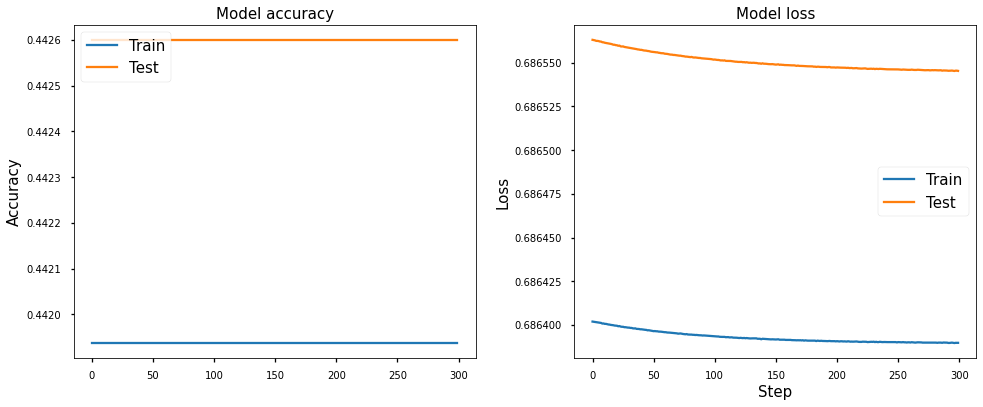

In [128]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(training_accuracy)
plt.plot(test_accuracy)
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss', xlabel = 'Step')
plt.plot(training_losses)
plt.plot(test_losses )
plt.legend(['Train', 'Test'], loc=0)

plt.tight_layout()
plt.show()